<br><h2>Analysis Report - Apprentice Chef Dataset</h2>

<b> Machine Learning </b> <br>

Burcu Dogru - MSBA<br>
Hult International Business School

### Objective


Apprentice Chef, Inc. is a company who offer a wide selection of daily-prepared gourmet meals delivered directly to customers door. My goal as a business analyst is to build a ML model which is going to predict how much revenue to expect over the first year of each customer's life cycle as well as to build a classification model to predict which customers will subscribe to their promotion service called Halfway There.

### Revenue 

#### Revenue Code 

In [18]:
#importing necessary libraries
import pandas as pd #datascience essentials
import matplotlib.pyplot as plt #essential graphical output
import seaborn as sns #enhanced graphical output
import numpy as np #mathematical essentials
import statsmodels.formula.api as smf #regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # Linear Regression
import sklearn.linear_model # linear models


#setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)


#specifying the file name
file = './datasets/feature_engineered_1.xlsx'

#reading the file into python
apprentice_df = pd.read_excel( io = file)

In [19]:
# Building a full-model
lm_full = smf.ols(formula =  """log_REVENUE ~ TOTAL_MEALS_ORDERED +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            AVG_TIME_PER_SITE_VISIT +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            PERSONAL +
                                            PROFESSIONAL +
                                            SPAM +
                                            log_LARGEST_ORDER_SIZE +
                                            new_CONTACTS_W_CUSTOMER_SERVICE +
                                            new_TOTAL_MEALS_ORDERED +
                                            new_TOTAL_PHOTOS_VIEWED +
                                            new_UNIQUE_MEALS_PURCH +
                                            new_MEDIAN_MEAL_RATING2 """,
                                  data = apprentice_df)

# Step 2: FIT the data into the model object
results = lm_full.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     558.5
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:49:27   Log-Likelihood:                 1889.8
No. Observations:                1946   AIC:                            -3748.
Df Residuals:                    1930   BIC:                            -3658.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [20]:
# declaring set of x-variables with only significant variables
x_variables = ['TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME',
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'PERSONAL', 'PROFESSIONAL',
                'SPAM', 'log_LARGEST_ORDER_SIZE', 'new_CONTACTS_W_CUSTOMER_SERVICE', 'new_TOTAL_MEALS_ORDERED',
                'new_TOTAL_PHOTOS_VIEWED', 'new_UNIQUE_MEALS_PURCH', 'new_MEDIAN_MEAL_RATING2']


In [21]:
# preparing x variables from the full model
apprentice_df_full = apprentice_df.drop(['REVENUE','log_REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

# preparing x-variables from the OLS model
apprentice_df_ols = apprentice_df[x_variables]

# preparing response variable
apprentice_df_target = apprentice_df['log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_df_full,     # x-variables
            apprentice_df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            apprentice_df_ols,         # x-variables
            apprentice_df_target,      # y-variable
            test_size = 0.25,
            random_state = 219)

In [32]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(3))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(3)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(3)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(3)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(3))
lr_test_gap = abs(lr_train_score - lr_test_score).round(3)

OLS Training Score : 0.812
OLS Testing Score  : 0.812
OLS Train-Test Gap : 0.0


In [23]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_df_full[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.95)
('TOTAL_MEALS_ORDERED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.04)
('PERSONAL', -0.0)
('PROFESSIONAL', -0.0)
('SPAM', 0.0)
('log_LARGEST_ORDER_SIZE', 0.22)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.5)
('new_TOTAL_MEALS_ORDERED', -0.21)
('new_TOTAL_PHOTOS_VIEWED', -0.02)
('new_UNIQUE_MEALS_PURCH', 0.25)
('new_MEDIAN_MEAL_RATING2', 0.09)


#### Revenue Insight-1

In [30]:
# Interpreting coefficients 
#(Calculation based on log transformation on response var and x variable:Largest order size)
#coeff log_LARGEST_ORDER_SIZE : 0.22 
print(round(((1.10**0.22)-1)*100, 3))

2.119


There is a significant relationship between our Largest Order Size and Revenue generation. For every 10% increase in the largest order size variable, our revenue increases by about 2.2 percent. 

#### Revenue Insight-2

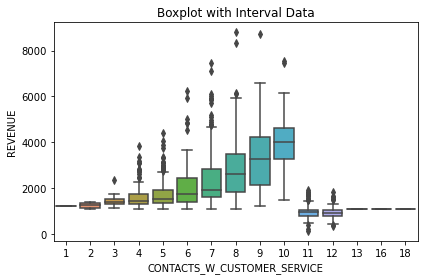

In [26]:
########################
# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = apprentice_df)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()


In [31]:
# Interpreting coefficients. (Calculation based on log transformation on response var)
import math
print(round((math.exp(-0.5)-1)*100, 3))

-39.347


For every customer that contacts Apprentice chef's customer service more than 10 times, results in %39 revenue lost for our company. Our analysis show that the customers that are used customer service more than 10 times are specifically the calls for complaints. 

### Cross Sell Success 

#### Cross Sell Success Code

In [66]:
# importing libraries
import random            as rand                     # random number gen
import numpy             as np
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
apprentice_df = pd.read_excel('./datasets/feature_engineered_2.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


In [67]:
# declaring explanatory variables
apprentice_data = apprentice_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
apprentice_target = apprentice_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [68]:
candidate_dict = {

# feature importance variables only
 'logit_new'           : ['REVENUE','MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES','PC_LOGINS', 'EARLY_DELIVERIES' ,
                          'LATE_DELIVERIES','REFRIGERATED_LOCKER','CANCELLATIONS_AFTER_NOON', 'number_of_names', 'LATE_DELIVERIES', 'PROFESSIONAL', 'PERSONAL'] 

}

In [69]:
# train/test split with the full model
apprentice_data   =  apprentice_df.loc[ : , candidate_dict['logit_new']]
apprentice_target =  apprentice_df.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprentice_target)


# merging training data for statsmodels
apprentice_train = pd.concat([x_train, y_train], axis = 1)

In [70]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(3))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(3))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(3) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(3)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(3) # aucround(4) # auc

Training ACCURACY: 0.753
Testing  ACCURACY: 0.778
AUC Score        : 0.725


In [72]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

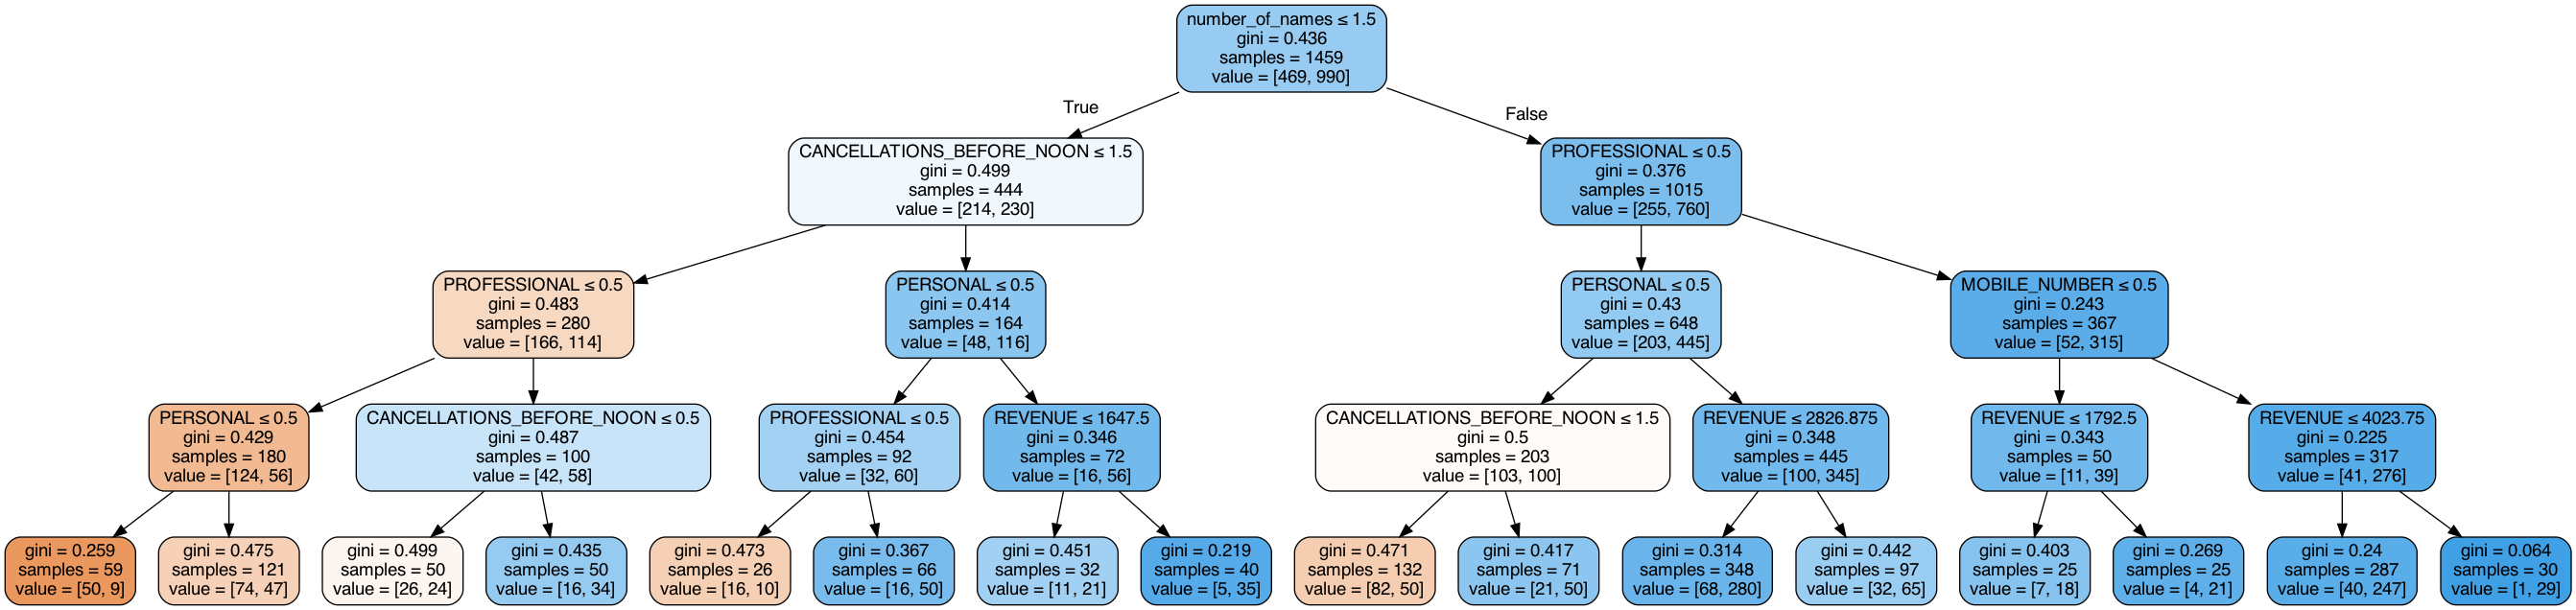

In [73]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-72-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


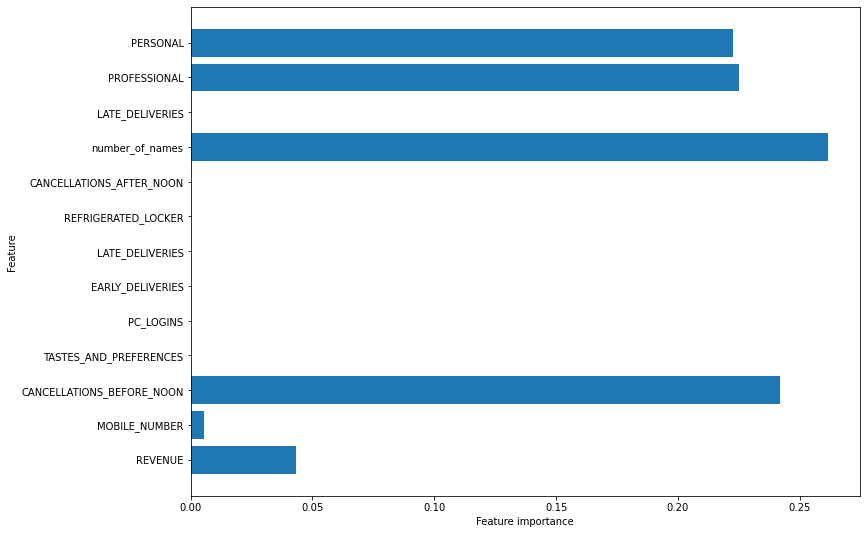

In [74]:
#Plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)


#### Cross Sell Success Insights

Customers who signed up using personal and professional email domains are way more likely to subscribe for Halfway There.


### Conclusion

Revenue model's highest R-Square:  0.812; meaning we are %81.2 confident that our revenue model predictions are correct.


Predictive models best AUC score: 0.725; meaning we are %72.5 confident that whether a customer in the database is going to sucscribe to Halfway There.

RECOMMENDATIONS : 

*Apprentice Chef should consider increase their investments for customers that are likely to be families or households with larger number of people. Increase variety of special/larger size meals, or consider creating birthday/special day promotions for families.
    
*Apprentice Chef should conduct more niche analysis for the customers that contacted customer service more than 10 times to understand customer pain points. 

*Apprentice Chef should consider disabling sign up options on their website or mobile app to those domains that are more likely be belong to SPAM domain types.

<b> Referances </b>

Interpreting Log Transformations in a Linear Model; 

https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/